<a href="https://colab.research.google.com/github/abhaysrivastav/Pytorch/blob/master/MNIST_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install torch torchvision


In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))
                                ])
training_dataset = datasets.MNIST(root = '/data', train=True, download=True, transform = transform ) 
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size = 100, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 27849302.70it/s]                            


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 458988.15it/s]
  1%|          | 16384/1648877 [00:00<00:11, 146992.90it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 7179188.51it/s]                            
8192it [00:00, 189020.33it/s]


Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image* np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

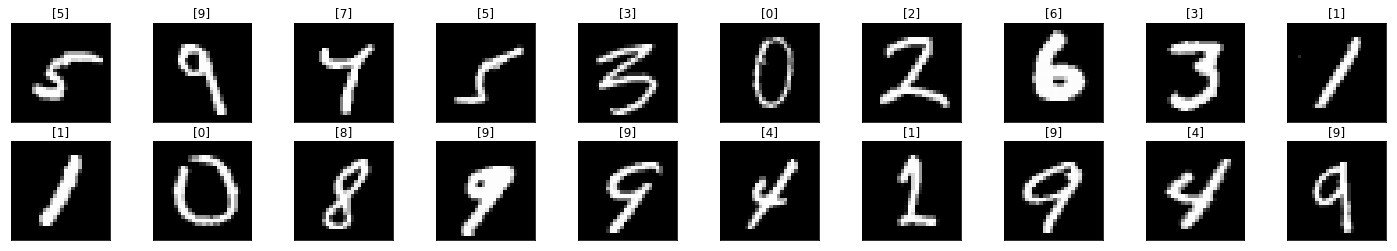

In [4]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1,  xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])
  
  

In [0]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)
  
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x



In [6]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)

In [12]:
epochs = 12
running_loss_history = []
running_corrects_history = []

for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
  else:
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    print('training loss: {:.4f}, acc{:.4f}'.format(epoch_loss, epoch_acc.item()) )

training loss: 0.2014, acc94.1067
training loss: 0.1942, acc94.4117
training loss: 0.1919, acc94.4033
training loss: 0.1914, acc94.4583
training loss: 0.1749, acc95.0733
training loss: 0.1738, acc95.0917
training loss: 0.1677, acc95.2850
training loss: 0.1637, acc95.4267
training loss: 0.1663, acc95.3300
training loss: 0.1634, acc95.5033
training loss: 0.1564, acc95.6083
training loss: 0.1586, acc95.6267
